In [1]:
import numpy as np
import quantumWalkUtility
import sympy
import matplotlib as plt

plt.style.use(['default'])

# 確率振幅ベクトルの成分が4つの場合
## モデルの説明

#### 1. 確率振幅ベクトル

各場所$(x,y)$に複素成分を持つ4次の縦ベクトル

#### 2. 時間発展ルール
量子ウォークの時間発展は$4\times4$の行列$P,Q,R,S$を用いて、

$\begin{aligned} \vec{\psi}_{t+1}(x, y)=& P \vec{\psi}_{t}(x+1, y)+Q \vec{\psi}_{t}(x-1, y) \\ &+R \vec{\psi}_{t}(x, y+1)+S \vec{\psi}_{t}(x, y-1) \end{aligned}$

で与えられる。ただし4つの行列$P,Q,R,S$は、

$P=\left[\begin{array}{cccc}a_{1} & a_{2} & a_{3} & a_{4} \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0\end{array}\right], \quad Q=\left[\begin{array}{cccc}0 & 0 & 0 & 0 \\ b_{1} & b_{2} & b_{3} & b_{4} \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0\end{array}\right]$
$R=\left[\begin{array}{cccc}0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ c_{1} & c_{2} & c_{3} & c_{4} \\ 0 & 0 & 0 & 0\end{array}\right], \quad S=\left[\begin{array}{cccc}0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ d_{1} & d_{2} & d_{3} & d_{4}\end{array}\right]$

の形で与えられる。

また、$P+Q+R+S$はユニタリ行列とする

#### 3. 確率

時刻$t$において、場所$x$に量子ウォークの位置が決まる確率は

$\mathbb{P}_{t}(x,y)=\left\|\vec{\psi}_{t}(x,y)\right\|^{2}$

で定義される

## モデルに必要な条件

1. $\sum_{x=-\infty}^{\infty}\sum_{y=-\infty}^{\infty}\left\|\vec{\psi}_{0}(x,y)\right\|^{2}=1$が成立するような初期確率振幅ベクトルを設定する
2. $P+Q+R+S$はユニタリ行列である

## 注目する行列

次のタイプの行列に注目する

##### グローバーウォーク

$P=\left[\begin{array}{rrrr}-\frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0\end{array}\right], \quad Q=\left[\begin{array}{llll}0 & 0 & 0 & 0 \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0\end{array}\right]$
$R=\left[\begin{array}{llll}0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} \\ 0 & 0 & 0 & 0\end{array}\right], \quad S=\left[\begin{array}{llll}0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & -\frac{1}{2}\end{array}\right]$

##### アダマールウォーク

$P=\left[\begin{array}{rrrr} \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0\end{array}\right], \quad Q=\left[\begin{array}{llll}0 & 0 & 0 & 0 \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0\end{array}\right]$
$R=\left[\begin{array}{llll}0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ 0 & 0 & 0 & 0\end{array}\right], \quad S=\left[\begin{array}{llll}0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2}\end{array}\right]$

##### 離散フーリエウォーク

$P=\left[\begin{array}{rrrr} \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0\end{array}\right], \quad Q=\left[\begin{array}{llll}0 & 0 & 0 & 0 \\ \frac{1}{2} & \frac{i}{2} & -\frac{1}{2} & -\frac{i}{2} \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0\end{array}\right]$
$R=\left[\begin{array}{llll}0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ 0 & 0 & 0 & 0\end{array}\right], \quad S=\left[\begin{array}{llll}0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ \frac{1}{2} & -\frac{i}{2} & -\frac{1}{2} & \frac{i}{2}\end{array}\right]$

ちなみに、数学的に厳密に解析されているのは$(x,y)=(0,0)$から出発するグローバーウォークのみ。（2015年時点）


## 数学的な結果からわかる確率分布の性質

グローバーウォーカーが原点$x=0,y=0$から出発するように初期確率振幅ベクトルを設定した時、長時間後の自明でない量子ウォークの確率分布は以下の性質を持つことが知られている

#### 性質1
原点付近に大きな確率をもち得る.
ただし，初期確率振幅べクトルの組合せによっては, この大きな確率は消える.
#### 性質2
原点を中心とする半径 $t/\sqrt{2}$ の円周付近の場所でも，確率分布はピークとなる.
#### 性質3
原点を中心とする半径 $t/\sqrt{2}$ の円の外側に量子ウォーカーの位置が決まる確率は，ほとんど 0 である.


### 実験22：グローバーウォーク
$P=\left[\begin{array}{rrrr}-\frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0\end{array}\right], \quad Q=\left[\begin{array}{llll}0 & 0 & 0 & 0 \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0\end{array}\right]$
$R=\left[\begin{array}{llll}0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} \\ 0 & 0 & 0 & 0\end{array}\right], \quad S=\left[\begin{array}{llll}0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & -\frac{1}{2}\end{array}\right]$


### 実験22-1
$\psi_0(0)=\left[\begin{matrix} 1 \\ 0 \\ 0 \\ 0 \end{matrix}\right]$,
$\psi_t(x)=\left[\begin{matrix} 0  \\ 0 \\ 0 \\ 0 \end{matrix}\right]$ $(x\neq0)$

### 実験22-2
$\psi_0(0)=\left[\begin{matrix} \frac{1}{2} \\ \frac{1}{2} \\ -\frac{1}{2} \\ -\frac{1}{2} \end{matrix}\right]$,
$\psi_t(x)=\left[\begin{matrix} 0  \\ 0 \\ 0 \\ 0 \end{matrix}\right]$ $(x\neq0)$



### 実験結果

/Users/aki/PycharmProjects/special-study/quantumWalkUtility.py:336: ComplexWarning: Casting complex values to real discards the imaginary part
  Z[count] = PSY[plot_t, x, y, 0] ** 2 + PSY[plot_t, x, y, 1] ** 2 + PSY[plot_t, x, y, 2] ** 2 + PSY[


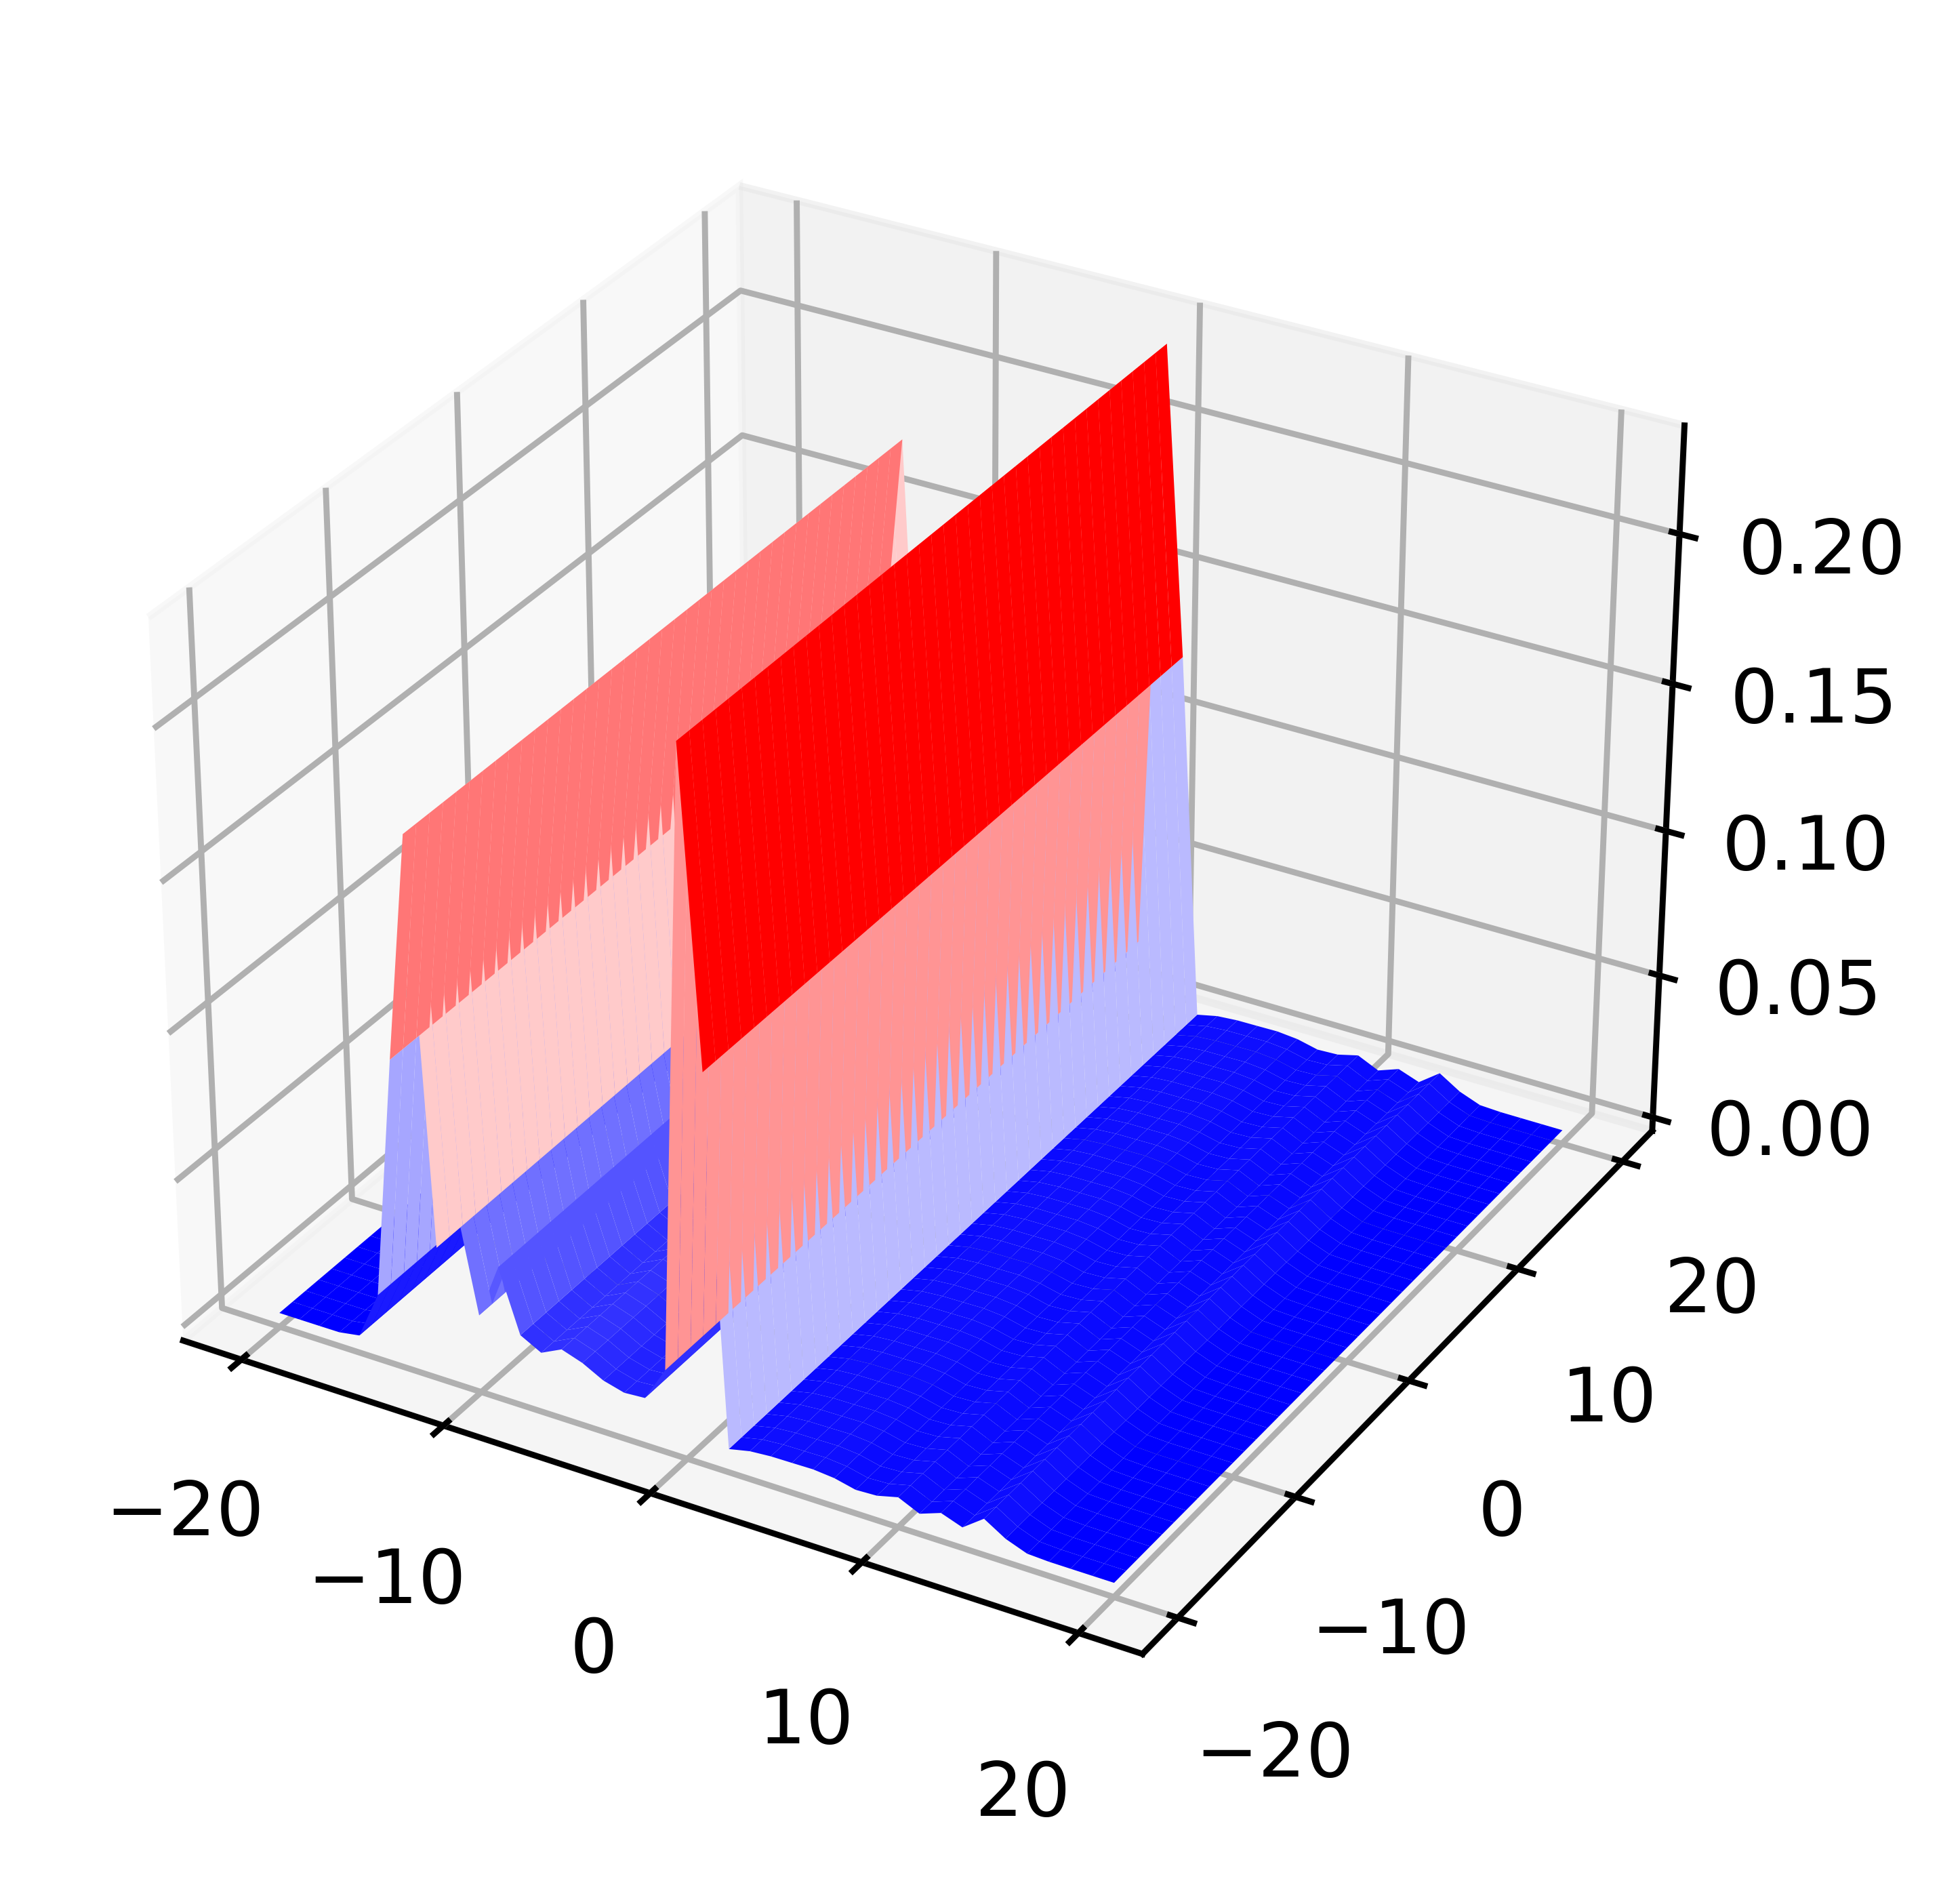

In [2]:
def exp_22(exp_code_chapter,PSY_init,description):
    """実験結果保存設定"""
    exp_code = "exp_22"
    folder_name, fig_title_name, file_name = quantumWalkUtility.save_setting(exp_code,exp_code_chapter,description)

    """実験"""
    T = 100
    P = np.array([[-1/2, 1/2, 1/2, 1/2], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]], dtype=np.complex128)
    Q = np.array([[0, 0, 0, 0], [1/2, -1/2, 1/2, 1/2], [0,0, 0, 0], [0, 0, 0, 0]], dtype=np.complex128)
    R = np.array([[0, 0, 0, 0], [0, 0, 0, 0], [1/2, 1/2, -1/2, 1/2], [0, 0, 0, 0]], dtype=np.complex128)
    S = np.array([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [1/2, 1/2, 1/2, -1/2]], dtype=np.complex128)
    PSY = quantumWalkUtility.quantum_walk_2d(T,P,Q,R,S,PSY_init)

    """プロット及び保存"""
    # plots_t = [0, 10, 20, 30, 50, 100]
    plots_t=[20]
    plot_graph_num_by_axis_row = 2
    plot_graph_num_by_axis_col = 3
    quantumWalkUtility.do_plot_3d(PSY,plots_t,plot_graph_num_by_axis_row,plot_graph_num_by_axis_col)

PSY_init = np.array([1, 0, 0, 0])
exp_22(exp_code_chapter=1,PSY_init=PSY_init,description="確率分布の時間発展1")

# PSY_init = np.array([1/2, 1/2, -1/2, -1/2])
# exp_22(exp_code_chapter=2,PSY_init=PSY_init,description="確率分布の時間発展6")